1. Data Exploration

In [1]:
# Importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor


In [2]:
#Loading the dataset
data=pd.read_excel("employee_burnout_analysis-AI 2.xlsx")

Exploring the data:

In [3]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [4]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [6]:
#checking the rows and coloumn numners in total
data.shape

(22750, 9)

Handeling the missing values:

In [7]:
#collecting data for total missing values in each column
print("Initial Missing Values:")
data.isnull().sum()

Initial Missing Values:


Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [8]:
# Create a KNN imputer object
knn_imputer = KNNImputer(n_neighbors=5)

# Apply the imputer to the entire dataset
data[['Resource Allocation', 'Mental Fatigue Score','Burn Rate']] = knn_imputer.fit_transform(data[['Resource Allocation', 'Mental Fatigue Score','Burn Rate']])


In [9]:
print("Final Missing Values after imputation")
data.isnull().sum()

Final Missing Values after imputation


Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

ONE HOT ENCODING

In [10]:
data = pd.get_dummies(data, columns=['Gender', 'Company Type', 'WFH Setup Available'], drop_first=True)

In [11]:
data.head()

,Employee ID,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Gender_Male,Company Type_Service,WFH Setup Available_Yes
0,fffe32003000360033003200,2008-09-30,2,3.0,3.8,0.16,False,True,False
1,fffe3700360033003500,2008-11-30,1,2.0,5.0,0.36,True,True,True
2,fffe31003300320037003900,2008-03-10,2,4.8,5.8,0.49,False,False,True
3,fffe32003400380032003900,2008-11-03,1,1.0,2.6,0.20,True,True,True
4,fffe31003900340031003600,2008-07-24,3,7.0,6.9,0.52,False,True,False


Checking the correlation if any between date of joining and burnout

In [12]:
# Ensuring 'Date of Joining' is in datetime format
data['Date of Joining'] = pd.to_datetime(data['Date of Joining'])

# Reference date (2008-01-01) converted to datetime
reference_date = pd.to_datetime("2008-01-01")

# Calculate the difference in days and create a new column 'Days'
data['Days'] = (data['Date of Joining'] - reference_date).dt.days

# Displaying
print(data[['Date of Joining', 'Days']].head())

  Date of Joining  Days
0      2008-09-30   273
1      2008-11-30   334
2      2008-03-10    69
3      2008-11-03   307
4      2008-07-24   205


Correlation Analysis with datetime using the column added as DAYS:

Checking the correlation of all numeric columns including the one hot encoding ones with Burn Rate:

In [13]:
print("Correlation of columns with Burn rate:")
correlation=data.corr(numeric_only=True)['Burn Rate']
print(correlation)

Correlation of columns with Burn rate:
Designation                0.740896
Resource Allocation        0.863902
Mental Fatigue Score       0.936970
Burn Rate                  1.000000
Gender_Male                0.155857
Company Type_Service       0.003204
WFH Setup Available_Yes   -0.304488
Days                      -0.000548
Name: Burn Rate, dtype: float64


Graphical Representation of  Correlation of categories with Burn Out

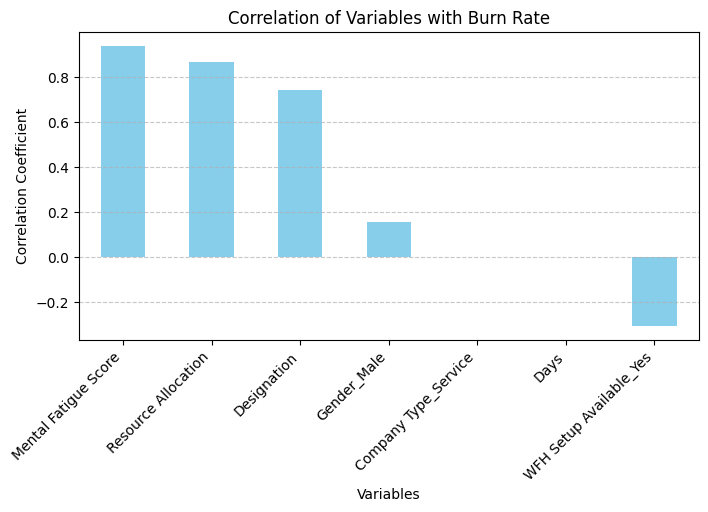

In [14]:
# Plot bar chart
plt.figure(figsize=(8, 4))
correlation.drop('Burn Rate').sort_values(ascending=False).plot(kind='bar', color='skyblue')  # Drop 'Burn Rate' itself
plt.title('Correlation of Variables with Burn Rate')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2. Data Preprocessing

In [15]:
#Split df into X and y
y=data['Burn Rate']
X=data.drop(['Employee ID','Date of Joining','Days','Burn Rate'],axis=1)

Dividing the data into training and testing sets

In [16]:
#Train-test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,shuffle=True,random_state=1)

3. Data Scaling and Model Training

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Selection

a. Linear Regression

In [18]:
#Create an instance of the Liner Regression Class
linear_regression_model=LinearRegression()

#Train the Model
linear_regression_model.fit(X_train_scaled,y_train)

LinearRegression()

Evaluating the Model on Training Data

In [19]:
#Assess how well the model fits the training data

# Predict values on training data
y_train_pred = linear_regression_model.predict(X_train_scaled)

# Evaluate model performance on training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error (MSE): {train_mse}")
print(f"Training R² Score: {train_r2}")


Training Mean Squared Error (MSE): 0.0035460592045201285
Training R² Score: 0.9086494454978331


Evaluating the Model on Test Data

In [20]:
# Predict values on test data
y_test_pred = linear_regression_model.predict(X_test_scaled)

# Evaluate model performance on test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)


print(f"Mean Absolute Error(MAE){test_mae}")
print(f"Test Mean Squared Error (MSE): {test_mse}")
print(f"Test R² Score: {test_r2}")


Mean Absolute Error(MAE)0.04694376354713491
Test Mean Squared Error (MSE): 0.003463233227117712
Test R² Score: 0.9116830073921665


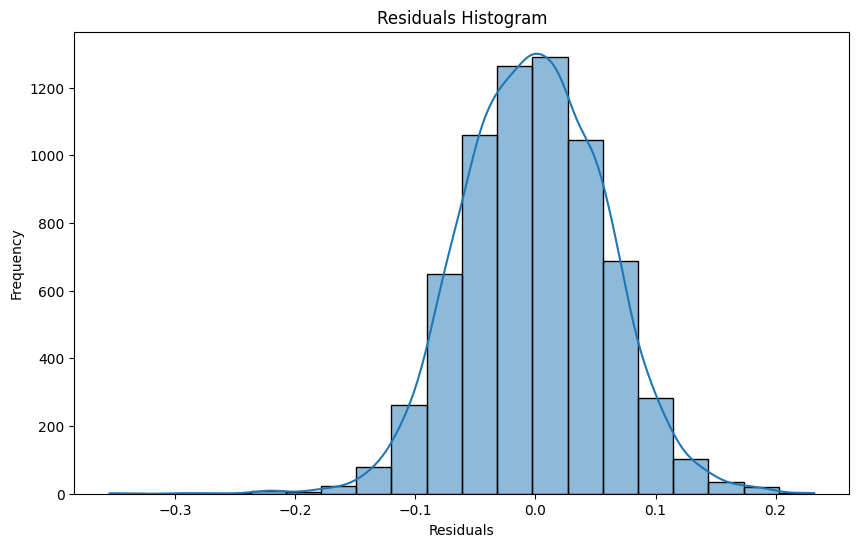

In [21]:
residuals = y_test - y_test_pred

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

b.KNN Classification

In [22]:

# Initializing the KNN Regressor with k=5
knn = KNeighborsRegressor(n_neighbors=5) 

In [23]:
# Training the KNN Regressor on training data
knn.fit(X_train, y_train)

# Making predictions using the test set
knn_predictions = knn.predict(X_test)

knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

# Evaluating KNN model performance
print("KNN Mean Absolute Error:",knn_mae)
print("KNN Mean Squared Error:", knn_mse)
print("KNN R^2 Score:", knn_r2)

KNN Mean Absolute Error: 0.04809739312282377
KNN Mean Squared Error: 0.0037874861040899624
KNN R^2 Score: 0.9034141334640712


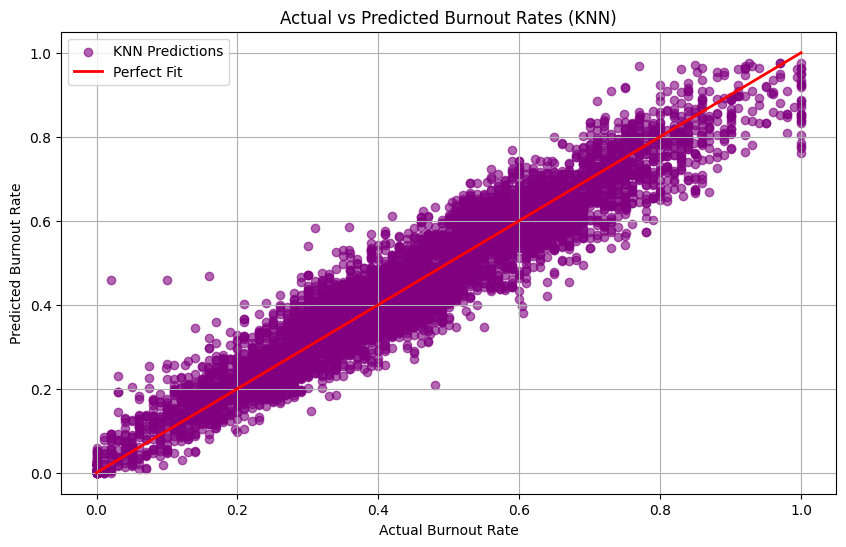

In [24]:

# Plotting actual vs predicted burnout rates for KNN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_predictions, alpha=0.6, color='purple', label='KNN Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit')
plt.title('Actual vs Predicted Burnout Rates (KNN)')
plt.xlabel('Actual Burnout Rate')
plt.ylabel('Predicted Burnout Rate')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
# Display coefficients and their corresponding features
coefficients = linear_regression_model.coef_
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print(feature_importance)


                   Feature  Coefficient
2     Mental Fatigue Score     0.135074
1      Resource Allocation     0.061164
3              Gender_Male     0.002667
4     Company Type_Service    -0.000031
0              Designation    -0.003182
5  WFH Setup Available_Yes    -0.005936


Comparison

In [26]:
# Printing Comparison
print("Model Comparison:")
print("Linear Regression - MAE:", test_mae, ", MSE:", test_mse, ", R^2 Score:", test_r2)
print("KNN               - MAE:", knn_mae, ", MSE:", knn_mse, ", R^2 Score:", knn_r2)


Model Comparison:
Linear Regression - MAE: 0.04694376354713491 , MSE: 0.003463233227117712 , R^2 Score: 0.9116830073921665
KNN               - MAE: 0.04809739312282377 , MSE: 0.0037874861040899624 , R^2 Score: 0.9034141334640712


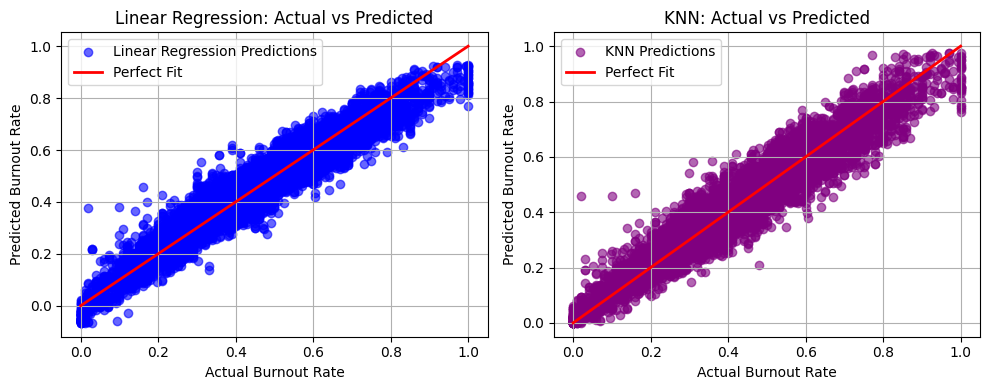

In [27]:

# Plotting Comparison of Predictions
plt.figure(figsize=(10, 4))

# Subplot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue', label='Linear Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Burnout Rate')
plt.ylabel('Predicted Burnout Rate')
plt.legend()
plt.grid(True)

# Subplot for KNN
plt.subplot(1, 2, 2)
plt.scatter(y_test, knn_predictions, alpha=0.6, color='purple', label='KNN Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit')
plt.title('KNN: Actual vs Predicted')
plt.xlabel('Actual Burnout Rate')
plt.ylabel('Predicted Burnout Rate')
plt.legend()
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()
